# Study of Principle Components Analysis

Here our goal is to get the principle components of a given dataset and visualizing it using 2 ways:
* Coding it from scratch
* Using pre built PCA class from sklearn.decomposition

Then we compare the results of PCA with and without dimensionality reduction using a classification algorithm of your choice, such as logistic regression, k-nearest neighbors, or support vector machines. Here I used KNN to measure the accuracy.

This assignment is done by - Spondan Bandyopadhyay (2105907)

Code link: https://github.com/SpondanB/PrincipleComponentAnalysisStudy

## Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Loading the data

In [2]:
# executing the function on iris flower dataset
# which originally have 4 features a.k.a. dimensions
data = datasets.load_iris()

X = data.data
y = data.target

## Coding PCA from scratch using the libraries imported

In [3]:
class PCA_scratch:
    def __init__(self, n_components):
        self.n_components = n_components  # no of dimensions post trans
        self.components = None
        self.mean = None
        
    def fit(self, x):
        # mean centering
        self.mean = np.mean(x, axis=0)
        x = x - self.mean
        
        # calculate covariance, functions needs samples as columns
        cov = np.cov(x.T)
        
        # eigen values and vectors
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        
        # for easier calculations we want transpose of eigenvector 
        # (also eigvec is a cloumn vector)
        eigenvectors = eigenvectors.T
        
        # sort eigvec according to eigvalues to get the dimensions with
        # the highest varience
        # as the highest varience gives the better picture to the data 
        # giving us a better view at the data
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[index]
        
        # storing the components till the required dimensionality
        self.components = eigenvectors[:self.n_components]
        
    
    def transform(self, x):
        # project the data
        x = x - self.mean
        return np.dot(x, self.components.T)
    
    def reconstruct(self, x):
        # reconstructing the data using the components and proj_val 
        # => PCA reconstruction=PC scores⋅Eigenvectors.T+Mean 
        # (here .T is transpose)
        return np.dot(x, self.components) +self.mean
    

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


Text(0, 0.5, 'pc2')

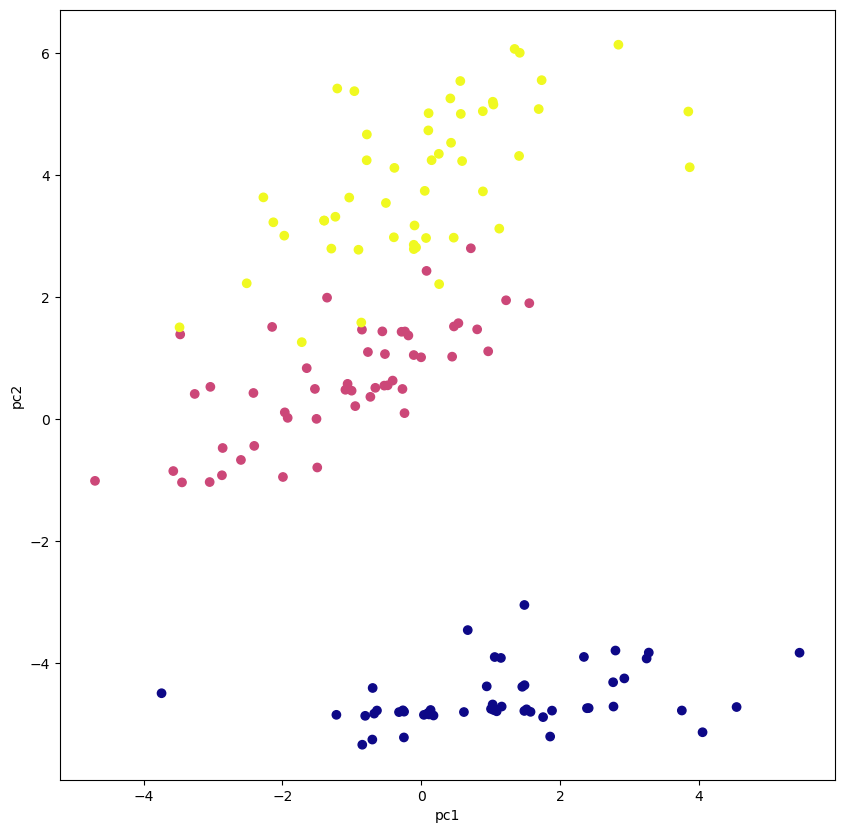

In [4]:
# Project the data onto the 2 primary principal components
pca = PCA_scratch(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape) 
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
# x3 = X_projected[:, 2]


plt.figure(figsize=(10,10))
plt.scatter(x1,x2,c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

## PCA using sklearn

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


Text(0, 0.5, 'pc2')

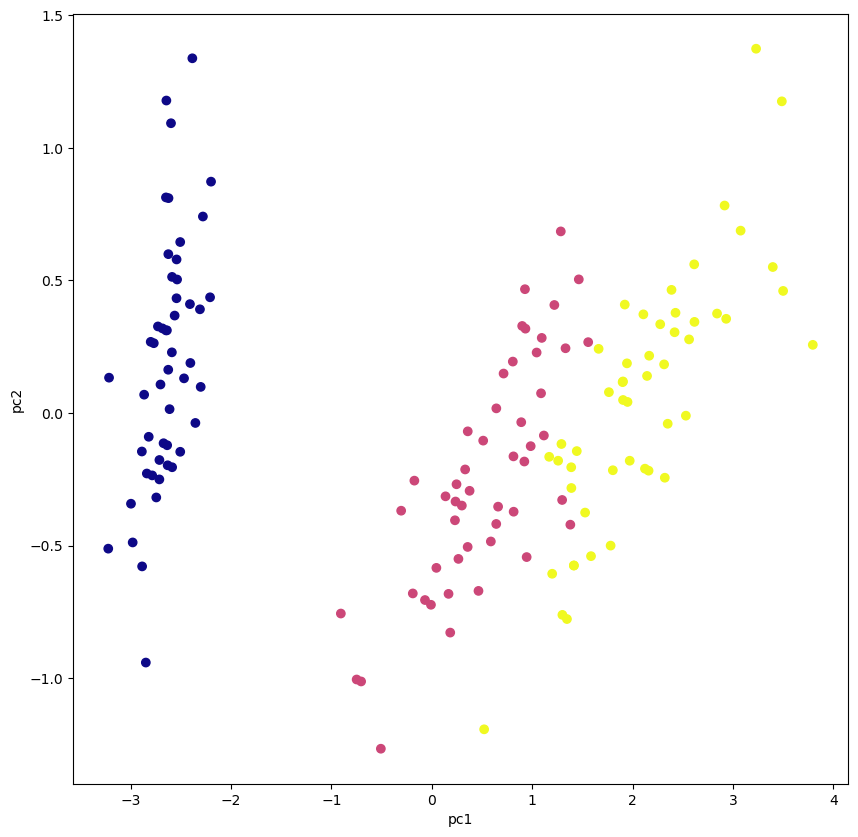

In [5]:
# Set the n_components=2 in the pre-defined PCA class
# Note that here the data is normalized, then PCA is done on it
principal=PCA(n_components=2)
principal.fit(X)
x=principal.transform(X)
 
# Check the dimensions of data after PCA
print("Shape of X:", X.shape) 
print("Shape of transformed X:", x.shape)

x1 = x[:, 0]
x2 = x[:, 1]

plt.figure(figsize=(10,10))
plt.scatter(x1,x2,c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

# Reconstructing the data

Here to reconstruct the data we use the previously defined reconstruct method from our PCA_scratch class. And we compare it to the original data using Mean Absolute value to check the error

In [6]:
X_reconst = pca.reconstruct(X_projected)

# error will be calculated as Mean Absolute Error
errorx0 = 0
errorx1 = 0
errorx2 = 0
errorx3 = 0

for i in range(150):
    # print(f"{X[i]}  |  {X_reconst[i]}")
    errorx0 += abs(X[i][0] - X_reconst[i][0])
    errorx1 += abs(X[i][1] - X_reconst[i][1])
    errorx2 += abs(X[i][2] - X_reconst[i][2])
    errorx3 += abs(X[i][3] - X_reconst[i][3])
errorx0 = errorx0/150
errorx1 = errorx1/150
errorx2 = errorx2/150
errorx3 = errorx3/150
print(f"""The error for each features is:
x0: {errorx0}
x1: {errorx1}
x2: {errorx2}
x3: {errorx3}""")

The error for each features is:
x0: 0.7096206472111485
x1: 5.418451465898156
x2: 0.8582181796835603
x3: 12.698936515738739


Here we can see the the error is the highest for x3 and x1. This is because the infuence of x1 and x3 on the principple components is minimal compared to that of x0 and x2. That leads to having inacurate values for those features.

# Results of KNN without dimension reduction

In [7]:
iris_df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                      columns= data['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

print(f'''training set size: {x_train.shape[0]} samples 
test set size: {x_test.shape[0]} samples''')

training set size: 120 samples 
test set size: 30 samples


In [9]:
scaler= Normalizer().fit(x_train) # fitted to the training set
normalized_x_train= scaler.transform(x_train) # applied on training set
normalized_x_test= scaler.transform(x_test) # applied to the test set

In [10]:
knn=KNeighborsClassifier(3)
knn.fit(normalized_x_train, y_train)
y_pred= knn.predict(normalized_x_test)
print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 2 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [11]:
print(f'The accuracy without dimension reduction is {accuracy_score(y_test, y_pred)}')

The accuracy without dimension reduction is 0.9666666666666667


# Results of KNN with dimension reduction
#### This using the X_projected which we got from PCA_scratch

In [12]:
iris_df = pd.DataFrame(data= np.c_[X_projected, data['target']],
                      columns= ['pc1', 'pc2'] + ['target'])
iris_df.head()

,pc1,pc2,target
0,1.483079,-4.780737,0.0
1,-0.679576,-4.824609,0.0
2,0.109717,-4.838001,0.0
3,-0.321732,-4.799671,0.0
4,1.881636,-4.775300,0.0


In [13]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(X_projected, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

print(f'''training set size: {x_train.shape[0]} samples 
test set size: {x_test.shape[0]} samples''')

training set size: 120 samples 
test set size: 30 samples


In [14]:
scaler= Normalizer().fit(x_train) # fitted to the training set
normalized_x_train= scaler.transform(x_train) # applied on training set
normalized_x_test= scaler.transform(x_test) # applied to the test set

In [15]:
knn=KNeighborsClassifier(3)
knn.fit(normalized_x_train, y_train)
y_pred= knn.predict(normalized_x_test)
print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 2 2 1 1 1 1 2 2 0 2 1 0 0 2 2 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [16]:
print(f'The accuracy with dimension reduction is {accuracy_score(y_test, y_pred)}')

The accuracy with dimension reduction is 0.7666666666666667


Here we can see that although the dimentionally reduced one gives a worst accuracy, it is still over 75% making it a viable solution. Therefore we see that the dimentionally reduced form can also give a accurate result.

Note that the performance of PCA and dimensionality reduction techniques in general can vary depending on the dataset and the machine learning task. It's important to experiment with different dimensionality reduction techniques and parameter settings to find the best approach for a given problem.